# Introduction

This notebook is a supplementary material for the Introduction Chapter of the [Hands-On Generative AI with Transformers and Diffusion Models book](https://learning.oreilly.com/library/view/hands-on-generative-ai/9781098149239/).

In [5]:
import diffusers
import huggingface_hub
import transformers

diffusers.logging.set_verbosity_error()
huggingface_hub.logging.set_verbosity_error()
transformers.logging.set_verbosity_error()

## Generating Images

In [3]:
# from genaibook.core import get_device

# device = get_device()
# print(f"Using device: {device}")

import torch

# 1. 确定最佳可用设备
if torch.cuda.is_available():
    device = "cuda"
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    # MPS (Metal Performance Shaders) is for Apple Silicon GPUs
    device = "mps"
else:
    device = "cpu"
print(f"Using device: {device}")


Using device: cuda


In [1]:
import os
proxy = 'http://192.168.31.241:7897'
os.environ['HTTP_PROXY'] = proxy
os.environ['HTTPS_PROXY'] = proxy


print(f"HTTP_PROXY set to: {os.environ.get('HTTP_PROXY', 'Not set')}")
print(f"HTTPS_PROXY set to: {os.environ.get('HTTPS_PROXY', 'Not set')}")
print(f"NO_PROXY set to: {os.environ.get('NO_PROXY', 'Not set')}")

HTTP_PROXY set to: http://192.168.31.241:7897
HTTPS_PROXY set to: http://192.168.31.241:7897
NO_PROXY set to: Not set


In [4]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    variant="fp16",
).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

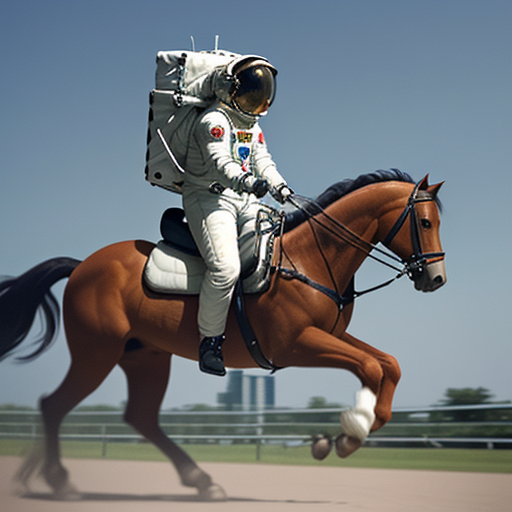

In [ ]:
prompt = "a photograph of an astronaut riding a horse"
pipe(prompt).images[0]

In [6]:
import torch
torch.manual_seed(0)

## Generating Text

In [8]:
from transformers import pipeline

classifier = pipeline("text-classification", device=device)
classifier("This movie is disgustingly good !")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998536109924316}]

In [9]:
from transformers import set_seed

# Setting the seed ensures we get the same results every time we run this code
set_seed(10)

In [10]:
generator = pipeline("text-generation")
prompt = "It was a dark and stormy"
generator(prompt)[0]["generated_text"]

'It was a dark and stormy year, and my mind went blank," says the 27-year-old, who has become more of a recluse than her social media pals. "It became harder to focus on the game of life and things'

## Generating Sound Clips

In [11]:
pipe = pipeline("text-to-audio", model="facebook/musicgen-small", device=device)
data = pipe("electric rock solo, very intense")

config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/231 [00:00<?, ?B/s]

In [12]:
print(data)

{'audio': array([[[0.06902502, 0.06021373, 0.11512608, ..., 0.04241787,
         0.03764801, 0.04308465]]], dtype=float32), 'sampling_rate': 32000}


In [13]:
import IPython.display as ipd

display(ipd.Audio(data["audio"][0], rate=data["sampling_rate"]))